LOAD DATA

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls "/content/gdrive/My Drive/DATASETS"

flower_photos


In [ ]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import cv2 
from tqdm import tqdm
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from random import shuffle  
from PIL import Image
import random as rn
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(os.listdir('/content/gdrive/My Drive/DATASETS/flower_photos'))

['dandelion', 'daisy', 'sunflowers', 'tulips', 'roses']


ORGANISE DATA

In [ ]:
X=[]
y=[]

labels = ['dandelion', 'daisy', 'sunflowers', 'tulips', 'roses']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
data = get_data("/content/gdrive/My Drive/DATASETS/flower_photos")

In [ ]:
for feature, label in data:
  X.append(feature)
  y.append(label)

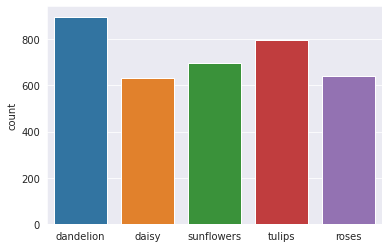

In [ ]:
l = []
for i in data:
    l.append(labels[i[1]])
sns.set_style('darkgrid')
sns.countplot(l)

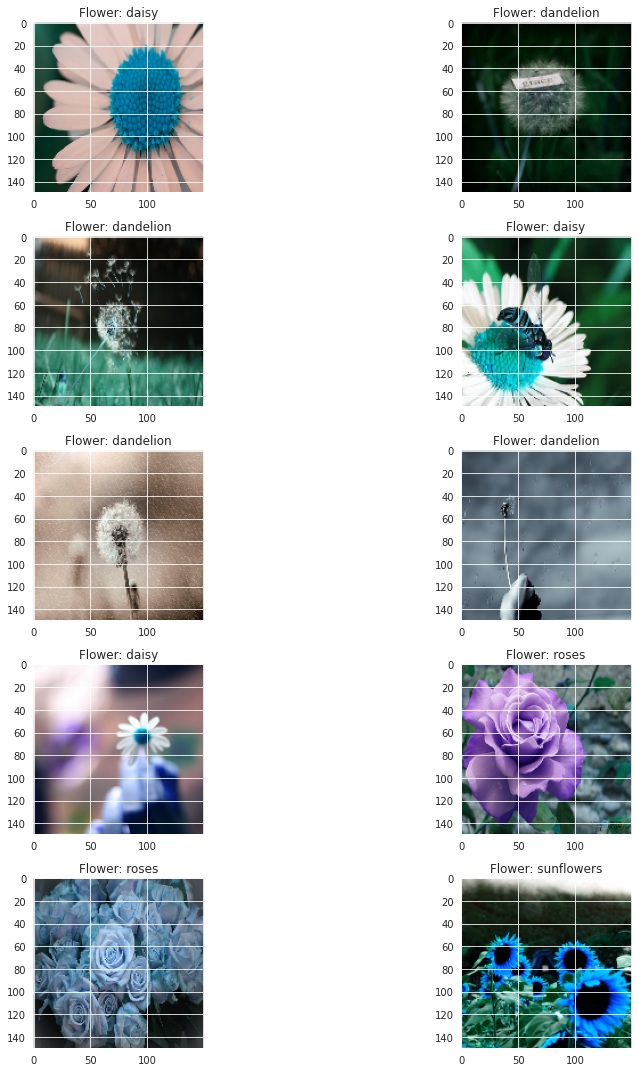

In [ ]:
import random as rn
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('Flower: '+labels[data[l][1]])
        
plt.tight_layout()

In [ ]:
pd.unique(labels)

array(['dandelion', 'daisy', 'sunflowers', 'tulips', 'roses'],
      dtype=object)

In [ ]:
pd.unique(y)

array([0, 1, 2, 3, 4])

In [ ]:
le=LabelEncoder()
y=le.fit_transform(y)
y=to_categorical(y,5)
X=np.array(X)
X=X/255

In [ ]:
"""
import pickle 
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()
"""

'\nimport pickle \npickle_out = open("X.pickle", "wb")\npickle.dump(X, pickle_out)\npickle_out.close()\n\npickle_out = open("y.pickle", "wb")\npickle.dump(y, pickle_out)\npickle_out.close()\n'

CREATE TRAIN AND TEST SET

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



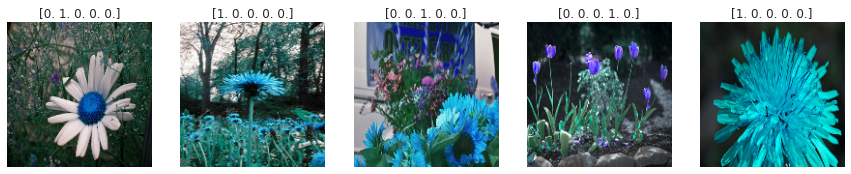

In [ ]:
plt.figure(figsize = (15,15))
for i in range(5):
    img = X_train[600*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[600*i])
plt.show()

In [ ]:
X_train.shape

(2936, 150, 150, 3)

In [ ]:
X_test.shape

(734, 150, 150, 3)

CREATE A MODEL (CNN)

In [ ]:
batch_size =64
epochs = 15

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=40,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=False)

datagen.fit(X_train)

In [ ]:
from keras.applications import VGG16
pre_trained_model = VGG16(input_shape=(150,150,3), include_top=False, weights="imagenet")
pre_trained_model.trainable = False
    
model = Sequential([
    pre_trained_model,
    MaxPooling2D((2,2) , strides = 2),
    Flatten(),
    Dense(5 , activation='softmax')])
model.compile(optimizer=Adam(lr=0.003) , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 10245     
Total params: 14,724,933
Trainable params: 10,245
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = model.fit(datagen.flow(X_train,y_train, batch_size = 64) , epochs = epochs , validation_data = (X_test, y_test))

Epoch 1/15
46/46 [==============================] - 24s 516ms/step - loss: 0.3179 - accuracy: 0.8693 - val_loss: 0.2303 - val_accuracy: 0.9139
Epoch 2/15
46/46 [==============================] - 21s 460ms/step - loss: 0.2230 - accuracy: 0.9102 - val_loss: 0.2124 - val_accuracy: 0.9177
Epoch 3/15
46/46 [==============================] - 21s 459ms/step - loss: 0.2069 - accuracy: 0.9151 - val_loss: 0.2153 - val_accuracy: 0.9104
Epoch 4/15
46/46 [==============================] - 21s 460ms/step - loss: 0.1910 - accuracy: 0.9245 - val_loss: 0.1858 - val_accuracy: 0.9226
Epoch 5/15
46/46 [==============================] - 21s 460ms/step - loss: 0.1827 - accuracy: 0.9277 - val_loss: 0.1933 - val_accuracy: 0.9226
Epoch 6/15
46/46 [==============================] - 21s 461ms/step - loss: 0.1798 - accuracy: 0.9290 - val_loss: 0.1784 - val_accuracy: 0.9253
Epoch 7/15
46/46 [==============================] - 21s 461ms/step - loss: 0.1693 - accuracy: 0.9319 - val_loss: 0.1828 - val_accuracy: 0.9272

In [ ]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(X_test,y_test)[1]*100))

734/734 [==============================] - 4s 5ms/step
Test Accuracy: 93.08%


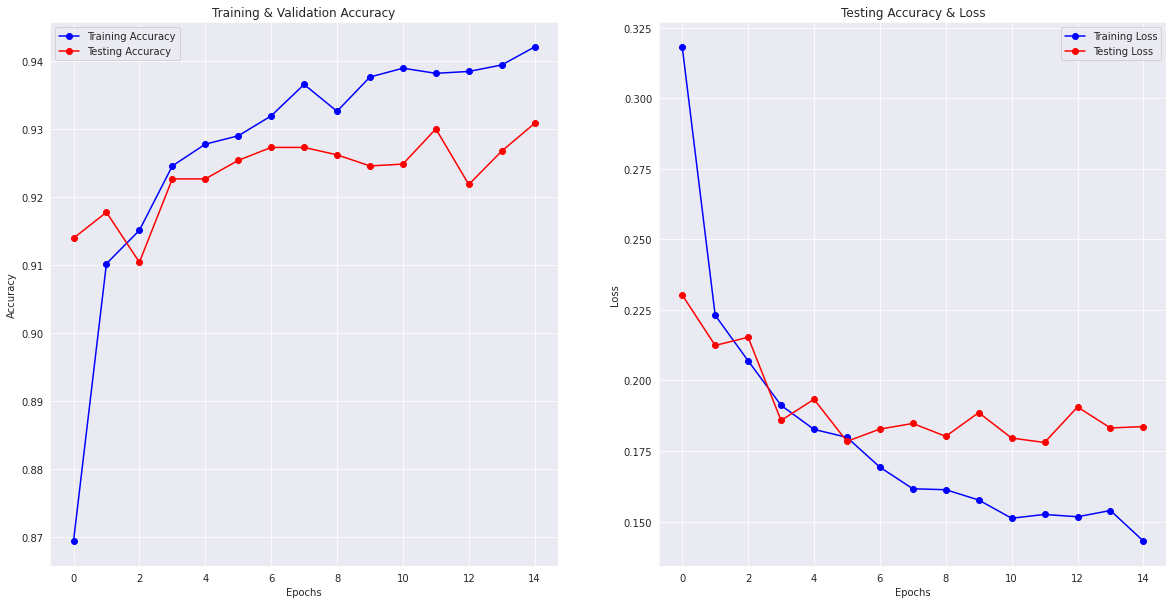

In [ ]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'bo-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'b-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()